# Tecnologías:
Python, Jupyter Notebook, Machine Learning, EDA

# Predicción de los precios de la vivienda en Colombia
Desarrollé y utilicé los datos proporcionados por la empresa inmobiliaria, un modelo para predecir los precios de la vivienda en Colombia correspondientes al año 2020

# Métrica a utilizar
​Como método de evaluación del desempeño del modelo, se utilizará la métrica de Exhaustividad (Recall), Adicionalmente, se incluye la Accuracy como métrica de control.​



# Archivos provistos:
- 'properties_colombia_train.csv': Contiene 197549 registros y 26 dimensiones, el cual incluye la información numérica del precio.
- 'propiedades_colombia_test.csv': Contiene 65850 registros y 25 dimensiones, el cual no incluye la información del precio.​

# Descripción de las dimensiones
- id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- ad_type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- lat - Latitud.
- lon - Longitud.
- l1 - Nivel administrativo 1: país.
- l2 - Nivel administrativo 2: usualmente provincia.
- l3 - Nivel administrativo 3: usualmente ciudad.
- l4 - Nivel administrativo 4: usualmente barrio.
- l5 - Nivel administrativo 5.
- l6 - Nivel administrativo 6.
- rooms - Cantidad de ambientes.
- bedrooms - Cantidad de dormitorios (útil en el resto de los países).
- bathrooms - Cantidad de baños.
- surface_total - Superficie total en m².
- surface_covered - Superficie cubierta en m².
- price - Precio publicado en el anuncio.
- currency - Moneda del precio publicado.
- price_period - Periodo del precio (Diario, Semanal, Mensual)
- title - Título del anuncio.
- description - Descripción del anuncio.
- property_type - Tipo de propiedad (Casa, Departamento, PH).
- operation_type - Tipo de operación (Venta).
- geometry - Puntos geométricos formados por las coordenadas latitud y longitud.​

# Plan de Ataque
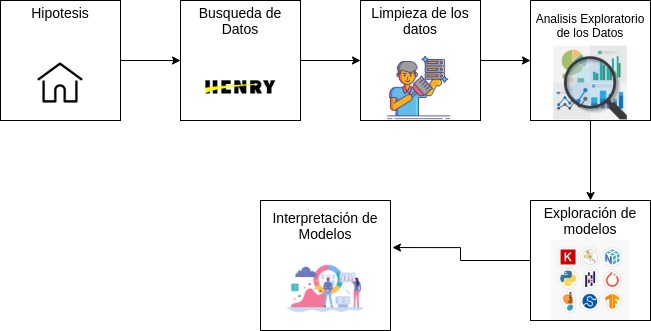

### Etapas:
Valores faltantes

Valores atípicos

Escalado/normalización

Codificación de variables categóricas

Selección de atributos relevantes

Ingeniería de features

# Analisis Exploratorio de los Datos

### Nos conectamos al Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importamos las librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Importamos los datasets

In [3]:
df_test = pd.read_csv('/content/drive/MyDrive/Datathon/properties_colombia/properties_colombia_test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Datathon/properties_colombia/properties_colombia_train.csv')

In [10]:
data = df_train.copy()
data.drop(['Unnamed: 0'], inplace=True, axis= 1)

# Analisis Exploratorio de los datos

## Buscamos valores atipicos

Text(0.5, 0, 'Precio ')

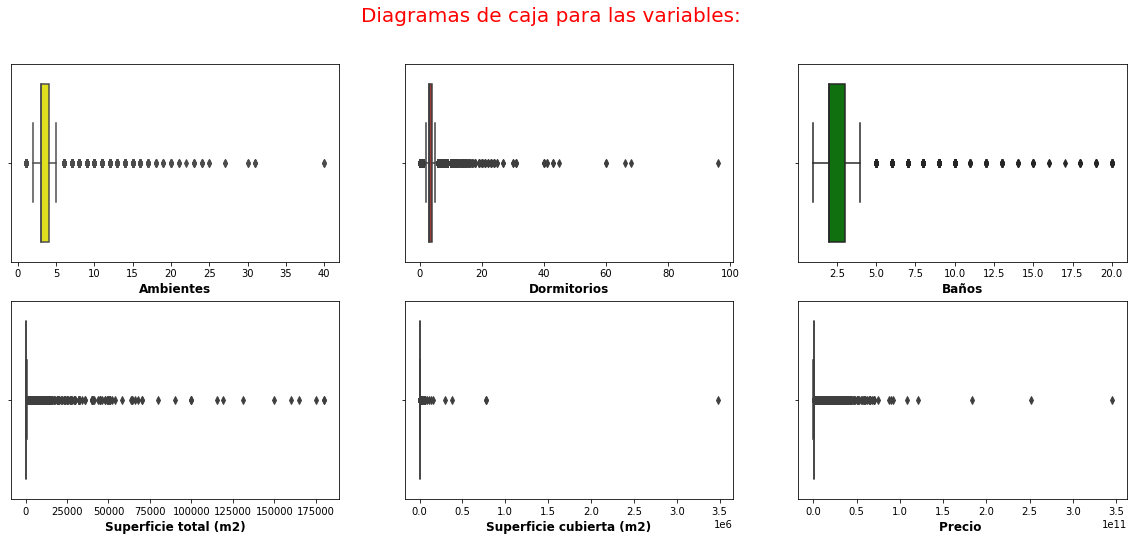

In [11]:
plt.figure(figsize=(20,8))

plt.suptitle('Diagramas de caja para las variables:', color='red', fontsize=20)

plt.subplot(2,3,1)
sns.boxplot(x=data['rooms'], color = 'yellow')
plt.xlabel('Ambientes', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,2)
sns.boxplot(x=data['bedrooms'], color = 'brown')
plt.xlabel('Dormitorios', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,3)
sns.boxplot(x=data['bathrooms'], color= 'green')
plt.xlabel('Baños', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,4)
sns.boxplot(x=data['surface_total'])
plt.xlabel('Superficie total (m2)', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,5)
sns.boxplot(x=data['surface_covered'])
plt.xlabel('Superficie cubierta (m2)', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,6)
sns.boxplot(x=data['price'])
plt.xlabel('Precio ', fontweight= 'black', fontsize= 12)

## graficamos diagramas de barras para las variables cuantitativas discretas e histogramas para las cuantitativas continuas



Text(0, 0.5, 'Cantidad')

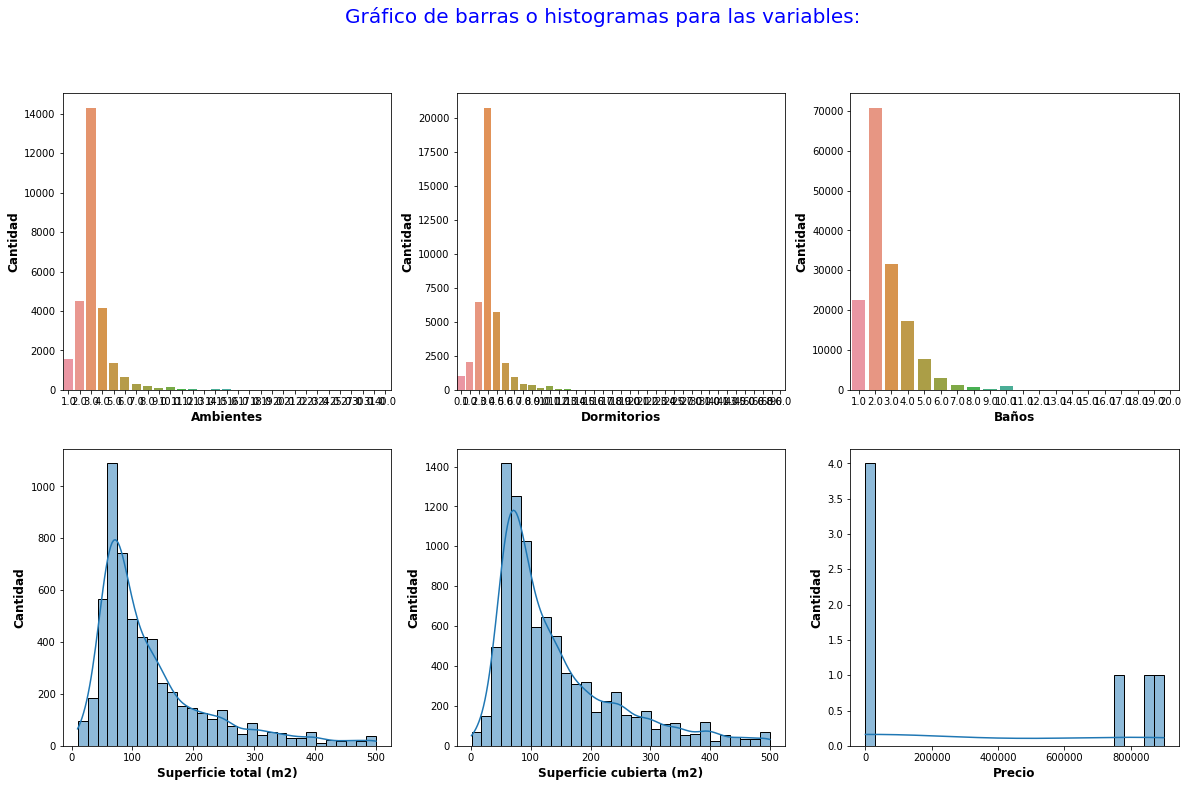

In [12]:
plt.figure(figsize=(20,12))

plt.suptitle('Gráfico de barras o histogramas para las variables:', color='Blue', fontsize=20)

plt.subplot(2,3,1)
sns.countplot(x= data.rooms)
plt.xlabel('Ambientes', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,2)
sns.countplot(x= data.bedrooms)
plt.xlabel('Dormitorios', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,3)
sns.countplot(x= 'bathrooms', data=data)
plt.xlabel('Baños', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,4)
max1= data[data.surface_total <=500] 
sns.histplot(max1['surface_total'], kde=True, bins=30)
plt.xlabel('Superficie total (m2)', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,5)
max2 = data[data.surface_covered <= 500]
sns.histplot(max2['surface_covered'], kde=True, bins=30)
plt.xlabel('Superficie cubierta (m2)', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,6)
max3 = data[data.price <= 900000]
sns.histplot(max3['price'], kde=True, bins=30)
plt.xlabel('Precio', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

In [13]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,148051.000000,148051.000000,27537.000000,40525.000000,156467.000000,6974.000000,9.802000e+03,1.974860e+05
mean,5.666001,-75.041045,3.291208,3.239062,2.639279,1352.132349,9.483356e+02,6.436051e+08
std,2.196804,1.104575,1.754795,1.985636,1.437174,7713.769352,3.730875e+04,1.944868e+09
min,-32.787342,-119.698190,1.000000,0.000000,1.000000,10.000000,1.000000e+00,0.000000e+00
25%,4.582315,-75.645126,3.000000,3.000000,2.000000,72.000000,7.100000e+01,2.000000e+08
50%,4.908611,-75.476654,3.000000,3.000000,2.000000,120.000000,1.140000e+02,3.300000e+08
75%,6.248101,-74.094001,4.000000,4.000000,3.000000,281.000000,2.160000e+02,6.000000e+08
max,34.420334,-67.482570,40.000000,96.000000,20.000000,180000.000000,3.480000e+06,3.450000e+11


###  Eliminamos los outliers aplicando la técnica del rango intercuartílico
La presencia de estos valores atípicos no solo que distorsionan el análisis, además afectaría de manera considerable el rendimiento de un modelo.

In [14]:
array = data[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

for i in array: 
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    BI = Q1 - 1.5*IQR
    BS = Q3 + 1.5*IQR
    #print (i,IQR, BI, BS)
    out = (data[i]<BI) | (data[i]>BS)
    print('Cantidad de valores eliminados para el atributo', [i],':', out.sum())
    data = data[~out]

data.shape

Cantidad de valores eliminados para el atributo ['rooms'] : 3236
Cantidad de valores eliminados para el atributo ['bedrooms'] : 16571
Cantidad de valores eliminados para el atributo ['bathrooms'] : 12198
Cantidad de valores eliminados para el atributo ['surface_total'] : 704
Cantidad de valores eliminados para el atributo ['surface_covered'] : 312
Cantidad de valores eliminados para el atributo ['price'] : 15125


(149403, 26)

### Volvemos a graficar

Text(0.5, 0, 'Precio')

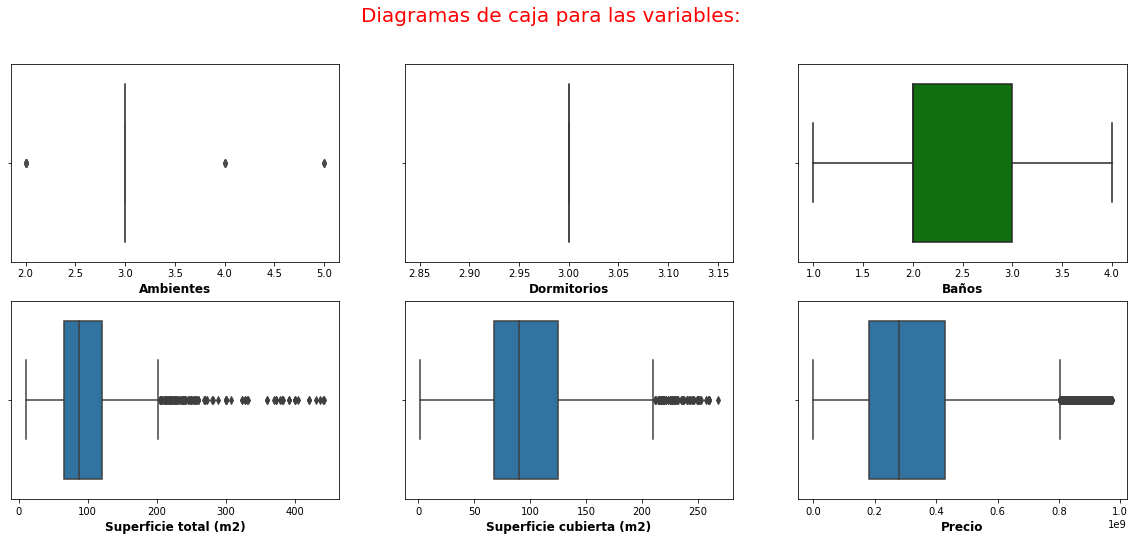

In [15]:
plt.figure(figsize=(20,8))

plt.suptitle('Diagramas de caja para las variables:', color='red', fontsize=20)

plt.subplot(2,3,1)
sns.boxplot(x=data['rooms'], color = 'yellow')
plt.xlabel('Ambientes', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,2)
sns.boxplot(x=data['bedrooms'], color = 'brown')
plt.xlabel('Dormitorios', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,3)
sns.boxplot(x=data['bathrooms'], color= 'green')
plt.xlabel('Baños', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,4)
sns.boxplot(x=data['surface_total'])
plt.xlabel('Superficie total (m2)', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,5)
sns.boxplot(x=data['surface_covered'])
plt.xlabel('Superficie cubierta (m2)', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,6)
sns.boxplot(x=data['price'])
plt.xlabel('Precio', fontweight= 'black', fontsize= 12)

Text(0, 0.5, 'Cantidad')

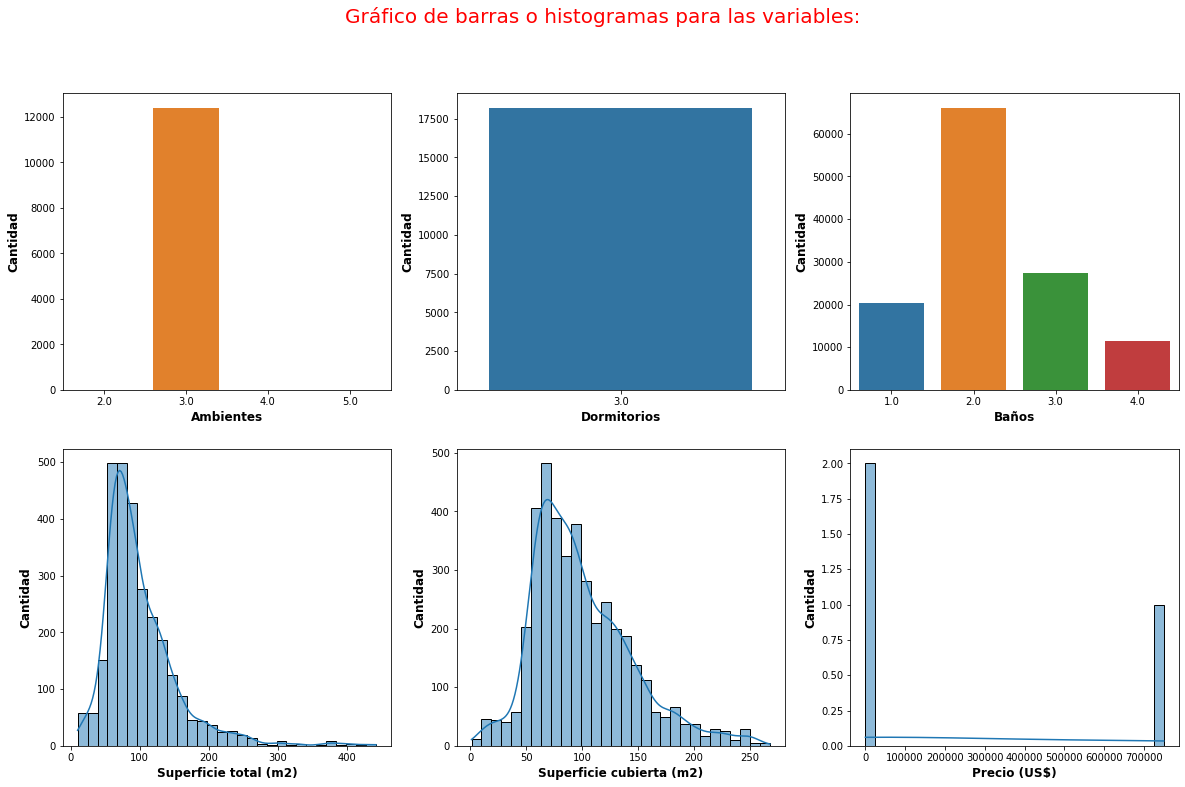

In [16]:
plt.figure(figsize=(20,12))

plt.suptitle('Gráfico de barras o histogramas para las variables:', color='red', fontsize=20)

plt.subplot(2,3,1)
sns.countplot(x= data.rooms)
plt.xlabel('Ambientes', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,2)
sns.countplot(x= data.bedrooms)
plt.xlabel('Dormitorios', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,3)
sns.countplot(x= 'bathrooms', data=data)
plt.xlabel('Baños', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,4)
max1= data[data.surface_total <=500] #Este valor arbitrario es para permitir su correcta visualización en un histograma
sns.histplot(max1['surface_total'], kde=True, bins=30)
plt.xlabel('Superficie total (m2)', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,5)
max2 = data[data.surface_covered <= 500]
sns.histplot(max2['surface_covered'], kde=True, bins=30)
plt.xlabel('Superficie cubierta (m2)', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,6)
max3 = data[data.price <= 900000]
sns.histplot(max3['price'], kde=True, bins=30)
plt.xlabel('Precio (US$)', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

In [17]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,107140.000000,107140.000000,12428.000000,18215.0,125265.000000,2845.000000,4116.000000,1.493720e+05
mean,5.755436,-75.055225,3.000241,3.0,2.237057,100.223550,99.567784,3.307583e+08
std,2.247664,1.115498,0.049945,0.0,0.830275,54.367052,44.260699,1.992205e+08
min,0.825542,-119.698190,2.000000,3.0,1.000000,10.000000,1.000000,0.000000e+00
25%,4.587000,-75.635231,3.000000,3.0,2.000000,65.000000,68.000000,1.800000e+08
50%,5.049094,-75.484000,3.000000,3.0,2.000000,87.000000,90.000000,2.800000e+08
75%,6.288273,-74.124130,3.000000,3.0,3.000000,120.000000,125.000000,4.290000e+08
max,34.420334,-67.924336,5.000000,3.0,4.000000,442.000000,268.000000,9.722822e+08


# Analizamos los valores faltantes

In [18]:
data.isnull().sum()

id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                 42263
lon                 42263
l1                      0
l2                      0
l3                   6630
l4                 120119
l5                 132922
l6                 145994
rooms              136975
bedrooms           131188
bathrooms           24138
surface_total      146558
surface_covered    145287
price                  31
currency               33
price_period       119610
title                   0
description            79
property_type           0
operation_type          0
geometry                0
dtype: int64

Respecto a los valores faltantes en latitud y longitud, lo más razonable sería colocar en ellos un valor acorde al barrio en el cual esas viviendas se ubican

In [19]:
data.bathrooms.isnull().groupby([data['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Apartamento,6810
1,Casa,2532
2,Finca,243
3,Local comercial,447
4,Lote,11660
5,Oficina,316
6,Otro,2127
7,Parqueadero,3


Una opción podría ser reemplazar los valores nulos de los bathrooms según el tipo de propiedad

In [20]:
data.bathrooms.isnull().groupby([data['price']]).sum().astype(int).reset_index(name='count')

,price,count
0,0.0,2
1,750000.0,1
2,1143711.0,1
3,9750000.0,1
4,14000000.0,3
...,...,...
3853,967976221.0,0
3854,968000000.0,2
3855,970000000.0,8
3856,971190000.0,1


In [21]:
data['price-intervalos'] = pd.cut(data.price, bins  = 15)
vf_bathrooms_price = data.bathrooms.isnull().groupby([data['price-intervalos']]).sum().astype(int).reset_index(name='count')
vf_bathrooms_price

,price-intervalos,count
0,"(-972282.15, 64818810.0]",1380
1,"(64818810.0, 129637620.0]",2368
2,"(129637620.0, 194456430.0]",3226
3,"(194456430.0, 259275240.0]",3107
4,"(259275240.0, 324094050.0]",2843
5,"(324094050.0, 388912860.0]",2175
6,"(388912860.0, 453731670.0]",1936
7,"(453731670.0, 518550480.0]",1332
8,"(518550480.0, 583369290.0]",1106
9,"(583369290.0, 648188100.0]",858


In [22]:
vf_bathrooms_price['freq'] = round(vf_bathrooms_price['count']/data.groupby([data['price-intervalos']]).count()['price'].values,5)*100
vf_bathrooms_price

,price-intervalos,count,freq
0,"(-972282.15, 64818810.0]",1380,50.145
1,"(64818810.0, 129637620.0]",2368,18.503
2,"(129637620.0, 194456430.0]",3226,12.158
3,"(194456430.0, 259275240.0]",3107,13.016
4,"(259275240.0, 324094050.0]",2843,12.413
5,"(324094050.0, 388912860.0]",2175,13.681
6,"(388912860.0, 453731670.0]",1936,15.849
7,"(453731670.0, 518550480.0]",1332,19.290
8,"(518550480.0, 583369290.0]",1106,17.126
9,"(583369290.0, 648188100.0]",858,19.729


In [23]:
vf_bathrooms_price["bin_centres"] = vf_bathrooms_price['price-intervalos'].apply(lambda x: x.mid)
vf_bathrooms_price

,price-intervalos,count,freq,bin_centres
0,"(-972282.15, 64818810.0]",1380,50.145,3.192326e+07
1,"(64818810.0, 129637620.0]",2368,18.503,9.722822e+07
2,"(129637620.0, 194456430.0]",3226,12.158,1.620470e+08
3,"(194456430.0, 259275240.0]",3107,13.016,2.268658e+08
4,"(259275240.0, 324094050.0]",2843,12.413,2.916846e+08
5,"(324094050.0, 388912860.0]",2175,13.681,3.565035e+08
6,"(388912860.0, 453731670.0]",1936,15.849,4.213223e+08
7,"(453731670.0, 518550480.0]",1332,19.290,4.861411e+08
8,"(518550480.0, 583369290.0]",1106,17.126,5.509599e+08
9,"(583369290.0, 648188100.0]",858,19.729,6.157787e+08


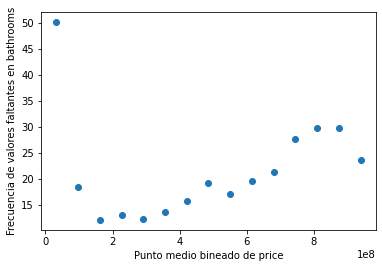

In [24]:
plt.scatter(vf_bathrooms_price['bin_centres'], vf_bathrooms_price['freq'])
plt.xlabel('Punto medio bineado de price')
plt.ylabel('Frecuencia de valores faltantes en bathrooms')
plt.show()

In [25]:
data.bathrooms.isnull().groupby([data['surface_covered']]).sum().astype(int).reset_index(name='count')

,surface_covered,count
0,1.0,1
1,3.0,1
2,4.0,1
3,5.0,2
4,6.0,2
...,...,...
237,253.0,0
238,257.0,0
239,259.0,0
240,260.0,2


In [26]:
data['surface_covered-intervalos'] = pd.cut(data.surface_covered, bins  = 15)
vf_bathrooms_surface = data.bathrooms.isnull().groupby([data['surface_covered-intervalos']]).sum().astype(int).reset_index(name='count')
vf_bathrooms_surface

,surface_covered-intervalos,count
0,"(0.733, 18.8]",36
1,"(18.8, 36.6]",53
2,"(36.6, 54.4]",35
3,"(54.4, 72.2]",46
4,"(72.2, 90.0]",27
5,"(90.0, 107.8]",12
6,"(107.8, 125.6]",10
7,"(125.6, 143.4]",12
8,"(143.4, 161.2]",5
9,"(161.2, 179.0]",4


In [27]:
vf_bathrooms_surface['freq'] = round(vf_bathrooms_surface['count']/data.groupby([data['surface_covered-intervalos']]).count()['price'].values,5)*100
vf_bathrooms_surface

,surface_covered-intervalos,count,freq
0,"(0.733, 18.8]",36,65.455
1,"(18.8, 36.6]",53,63.095
2,"(36.6, 54.4]",35,13.619
3,"(54.4, 72.2]",46,5.186
4,"(72.2, 90.0]",27,3.383
5,"(90.0, 107.8]",12,2.124
6,"(107.8, 125.6]",10,2.203
7,"(125.6, 143.4]",12,3.125
8,"(143.4, 161.2]",5,2.024
9,"(161.2, 179.0]",4,3.636


In [28]:
vf_bathrooms_surface["bin_centres"] = vf_bathrooms_surface['surface_covered-intervalos'].apply(lambda x: x.mid)
vf_bathrooms_surface

,surface_covered-intervalos,count,freq,bin_centres
0,"(0.733, 18.8]",36,65.455,9.7665
1,"(18.8, 36.6]",53,63.095,27.7000
2,"(36.6, 54.4]",35,13.619,45.5000
3,"(54.4, 72.2]",46,5.186,63.3000
4,"(72.2, 90.0]",27,3.383,81.1000
5,"(90.0, 107.8]",12,2.124,98.9000
6,"(107.8, 125.6]",10,2.203,116.7000
7,"(125.6, 143.4]",12,3.125,134.5000
8,"(143.4, 161.2]",5,2.024,152.3000
9,"(161.2, 179.0]",4,3.636,170.1000


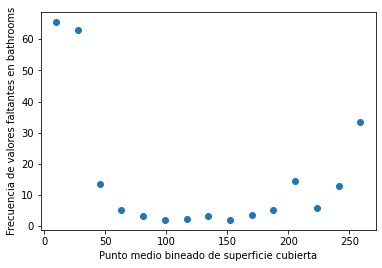

In [29]:
plt.scatter(vf_bathrooms_surface['bin_centres'], vf_bathrooms_surface['freq'])
plt.xlabel('Punto medio bineado de superficie cubierta')
plt.ylabel('Frecuencia de valores faltantes en bathrooms')
plt.show()

# IMPUTAMOS VALORES FALTANTES
imputamos los valores faltantes a través del método KNN Imputer, que aplica un modelo de Machine Learning para predecir ese valor que no se encuentra en el dataset, para imputar valores faltantes a través de este método, es necesario en una primera instancia escalar nuestros datos.

In [30]:
data = data.drop(['start_date','end_date', 'created_on', 'l1', 'l2','currency',
                  'title', 'description', 'operation_type', 'price-intervalos', 'surface_covered-intervalos'], axis=1)


In [31]:
data.head(5)

,id,ad_type,lat,lon,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,price_period,property_type,geometry
1,DlCxox9+FuugkxS2kBVfJg==,Propiedad,4.722748,-74.073115,Bogotá D.C,Zona Noroccidental,Suba,NaN,NaN,3.0,2.0,NaN,NaN,625000000.0,NaN,Apartamento,POINT (-74.0731146 4.7227485)
2,yitN1AigL45gh/K2YSF8rw==,Propiedad,4.709000,-74.030000,Bogotá D.C,Zona Norte,Usaquén,Bella Suiza,NaN,NaN,2.0,NaN,NaN,420000000.0,NaN,Casa,POINT (-74.03 4.709)
4,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,NaN,NaN,Medellín,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,210000000.0,NaN,Apartamento,POINT EMPTY
5,25/kKYGu15xlIwnX/5zxbg==,Propiedad,5.049009,-75.506802,Manizales,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,167952300.0,NaN,Apartamento,POINT (-75.50680161 5.04900894)
7,NZQXFp4JdYAfUErzAN/Mjw==,Propiedad,10.990806,-74.821082,Barranquilla,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,184000000.0,NaN,Apartamento,POINT (-74.8210818 10.9908065)


In [33]:
data = data.drop(['id','ad_type', 'l5', 'l4','l6',
                  'price_period'], axis=1)


In [34]:
data.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,geometry
1,4.722748,-74.073115,Bogotá D.C,NaN,3.0,2.0,NaN,NaN,625000000.0,Apartamento,POINT (-74.0731146 4.7227485)
2,4.709000,-74.030000,Bogotá D.C,NaN,NaN,2.0,NaN,NaN,420000000.0,Casa,POINT (-74.03 4.709)
4,NaN,NaN,Medellín,NaN,NaN,2.0,NaN,NaN,210000000.0,Apartamento,POINT EMPTY
5,5.049009,-75.506802,Manizales,NaN,NaN,2.0,NaN,NaN,167952300.0,Apartamento,POINT (-75.50680161 5.04900894)
7,10.990806,-74.821082,Barranquilla,NaN,NaN,2.0,NaN,NaN,184000000.0,Apartamento,POINT (-74.8210818 10.9908065)


In [35]:
data.reset_index(drop=True, inplace = True)

# Escalado de variables

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()

# Nos quedamos solamente con las variables de entrada que contienen atributos cuantitativos
data_scaled =data[['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]

data_scaled = pd.DataFrame(scaler.fit_transform(data_scaled), columns = data_scaled.columns)

In [37]:
data_scaled.bathrooms.value_counts()

-0.285518    66131
 0.918907    27286
-1.489943    20429
 2.123332    11419
Name: bathrooms, dtype: int64

In [38]:
print('Valores faltantes en bathrooms:', data_scaled.bathrooms.isna().sum())
print('Valores faltantes en latitud', data_scaled.lat.isna().sum())
print('Valores faltantes en longitud', data_scaled.lon.isna().sum())

Valores faltantes en bathrooms: 24138
Valores faltantes en latitud 42263
Valores faltantes en longitud 42263


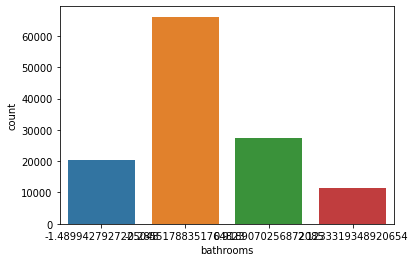

In [39]:
sns.countplot(data= data_scaled, x= 'bathrooms')


In [40]:
# volvemos a incoportar al dataset el atributo price
data_scaled = data_scaled.join(data['price'])

In [41]:
data_scaled


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,-0.459451,0.880427,NaN,0.0,-0.285518,NaN,NaN,625000000.0
1,-0.465568,0.919078,NaN,NaN,-0.285518,NaN,NaN,420000000.0
2,NaN,NaN,NaN,NaN,-0.285518,NaN,NaN,210000000.0
3,-0.314295,-0.404823,NaN,NaN,-0.285518,NaN,NaN,167952300.0
4,2.329260,0.209901,NaN,NaN,-0.285518,NaN,NaN,184000000.0
...,...,...,...,...,...,...,...,...
149398,-0.491959,0.800789,-0.004833,0.0,NaN,NaN,NaN,129000000.0
149399,-0.483809,0.896666,NaN,NaN,-1.489943,NaN,-1.865714,135000000.0
149400,-1.042169,-1.331945,NaN,NaN,-1.489943,NaN,NaN,520000000.0
149401,-0.480751,0.814123,NaN,NaN,-0.285518,NaN,NaN,290000000.0


In [42]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

data_imputed = pd.DataFrame(imputer.fit_transform(data_scaled), columns = data_scaled.columns)

In [43]:
data_imputed.bathrooms.value_counts()

-0.285518    69315
 0.918907    27286
-1.489943    22463
 2.123332    11453
-1.088468     2495
 0.115957     2472
-0.686993     2342
 0.517432     1753
 0.517432     1666
 0.918907     1532
-0.285518     1348
 1.721857      962
 0.918907      950
 1.320382      877
 0.115957      821
 0.115957      577
 1.320382      542
 0.918907      237
-0.285518      152
 0.115957       91
 0.115957       69
Name: bathrooms, dtype: int64

In [44]:
data_imputed.head(2)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,-0.459451,0.880427,-0.004833,0.0,-0.285518,-0.482427,-0.781099,625000000.0
1,-0.465568,0.919078,-0.004833,0.0,-0.285518,0.247309,0.130279,420000000.0


In [45]:
data_imputed = data_imputed.join(data['l3'])

In [47]:
data_imputed.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3
0,-0.459451,0.880427,-0.004833,0.0,-0.285518,-0.482427,-0.781099,625000000.0,Bogotá D.C
1,-0.465568,0.919078,-0.004833,0.0,-0.285518,0.247309,0.130279,420000000.0,Bogotá D.C
2,-0.532236,-0.202424,-0.004833,0.0,-0.285518,-0.451766,-0.796163,210000000.0,Medellín
3,-0.314295,-0.404823,-0.004833,0.0,-0.285518,1.044501,-0.374368,167952300.0,Manizales
4,2.329260,0.209901,-0.004833,0.0,-0.285518,0.872798,-0.404496,184000000.0,Barranquilla


# Encoding
Se realizará un encoding para la variable categórica del tipo de propiedad.

In [59]:
from sklearn.preprocessing import OneHotEncoder
data_encoded = data[['property_type']]
one = OneHotEncoder(handle_unknown = 'ignore')
data_encoded= pd.DataFrame(one.fit_transform(data_encoded).toarray())

In [60]:
databackup = data_imputed.copy()

In [61]:
data =data_imputed[['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered','price']]


In [62]:
data.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,-0.459451,0.880427,Bogotá D.C,-0.004833,0.0,-0.285518,-0.482427,-0.781099,625000000.0
1,-0.465568,0.919078,Bogotá D.C,-0.004833,0.0,-0.285518,0.247309,0.130279,420000000.0
2,-0.532236,-0.202424,Medellín,-0.004833,0.0,-0.285518,-0.451766,-0.796163,210000000.0
3,-0.314295,-0.404823,Manizales,-0.004833,0.0,-0.285518,1.044501,-0.374368,167952300.0
4,2.329260,0.209901,Barranquilla,-0.004833,0.0,-0.285518,0.872798,-0.404496,184000000.0


In [63]:
data = data.join(data_encoded)
data.head(2)

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,0,1,2,3,4,5,6,7
0,-0.459451,0.880427,Bogotá D.C,-0.004833,0.0,-0.285518,-0.482427,-0.781099,625000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.465568,0.919078,Bogotá D.C,-0.004833,0.0,-0.285518,0.247309,0.130279,420000000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


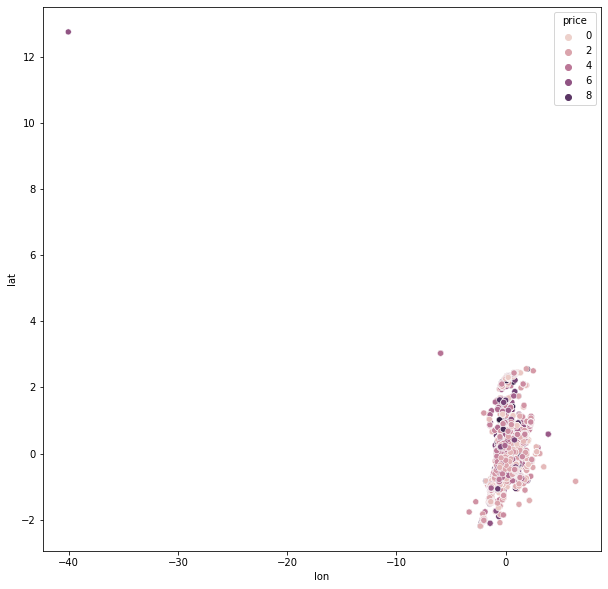

In [64]:
plt.figure(figsize = (10,10))
sns.scatterplot (data = data, x= 'lon', y= 'lat', hue = 'price')

In [65]:
data = data.drop(['l3'], axis=1)

In [66]:
data.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,0,1,2,3,4,5,6,7
0,-0.459451,0.880427,-0.004833,0.0,-0.285518,-0.482427,-0.781099,625000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.465568,0.919078,-0.004833,0.0,-0.285518,0.247309,0.130279,420000000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.532236,-0.202424,-0.004833,0.0,-0.285518,-0.451766,-0.796163,210000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.314295,-0.404823,-0.004833,0.0,-0.285518,1.044501,-0.374368,167952300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.329260,0.209901,-0.004833,0.0,-0.285518,0.872798,-0.404496,184000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
data.to_csv('/content/drive/MyDrive/Datathon/data.csv')

In [76]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,0,1,2,3,4,5,6,7
count,149403.000000,149403.000000,149403.000000,149403.0,149403.000000,149403.000000,149403.000000,1.494030e+05,149403.000000,149403.000000,149403.000000,149403.000000,149403.000000,149403.000000,149403.000000,149403.000000
mean,0.019531,-0.048038,0.014689,0.0,-0.002379,-0.218098,-0.328751,3.307806e+08,0.572331,0.278595,0.001707,0.003916,0.078057,0.003708,0.061665,0.000020
std,0.911442,0.889036,0.469634,0.0,0.978229,0.514792,0.598652,1.992074e+08,0.494742,0.448309,0.041278,0.062452,0.268263,0.060781,0.240548,0.004481
min,-2.193351,-40.020842,-20.027635,0.0,-1.489943,-1.659818,-2.227253,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.499866,-0.524295,-0.004833,0.0,-0.285518,-0.525353,-0.758503,1.800000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.306224,-0.301033,-0.004833,0.0,-0.285518,-0.384312,-0.464753,2.800000e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345564,0.517581,-0.004833,0.0,0.918907,-0.028642,-0.103214,4.290000e+08,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.753253,6.392590,40.040770,0.0,2.123332,6.287568,3.805920,9.722822e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
from sklearn.model_selection import train_test_split

X = data.drop(['price'], axis= 1)

y = data.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)


In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

tree_regressor = DecisionTreeRegressor(max_depth=8)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


KNeighborsRegressor()

In [80]:
y_train_pred = tree_regressor.predict (X_train)
y_test_pred = tree_regressor.predict (X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [81]:
print('La precisión del modelo de árbol de decisión en set de train es:', tree_regressor.score (X_train,y_train))
print('La precisión del modelo de árbol de decisión en set de test es:', tree_regressor.score (X_test,y_test))


La precisión del modelo de árbol de decisión en set de train es: 0.6692123359272848
La precisión del modelo de árbol de decisión en set de test es: 0.6767618300573203


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [82]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'La raíz del error cuadrático medio en Train es: {rmse_train}')
print(f'La raíz del error cuadrático medio en Test es: {rmse_test}')


La raíz del error cuadrático medio en Train es: 114725074.44246814
La raíz del error cuadrático medio en Test es: 112800402.3159846


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'valor predicho(US$)')

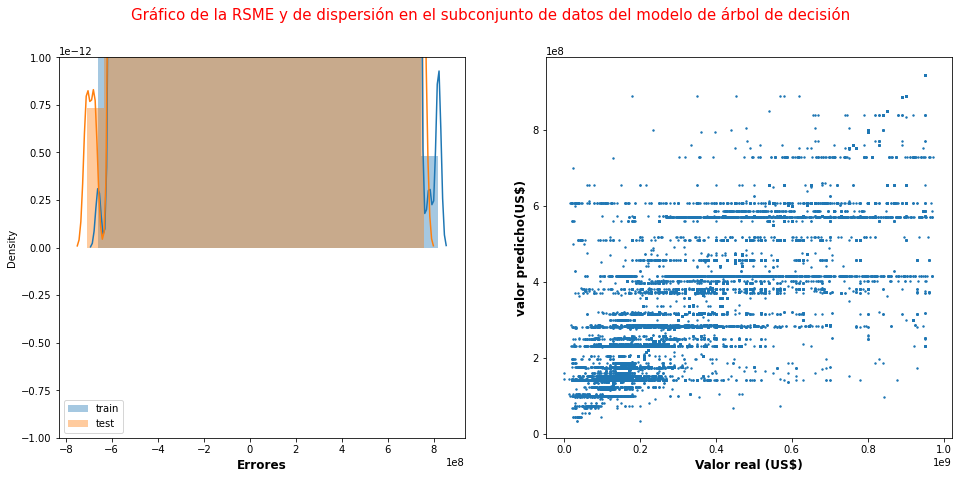

In [83]:
plt.figure(figsize = (16,7))
plt.suptitle('Gráfico de la RSME y de dispersión en el subconjunto de datos del modelo de árbol de decisión', fontsize= 15, color='red')

plt.subplot (1,2,1)

sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('Errores', fontweight = "black", fontsize = 12)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test,y_test_pred, s =2)
plt.xlabel('Valor real (US$)', fontweight = "black", fontsize = 12)
plt.ylabel('valor predicho(US$)', fontweight = "black", fontsize = 12)

In [84]:
y_train_pred_2 = knn_regressor.predict (X_train)
y_test_pred_2 = knn_regressor.predict (X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [85]:
print('La precisión del modelo de vecinos más cercanos en set de train es:', knn_regressor.score (X_train,y_train))
print('La precisión del modelo de vecinos más cercanos en set de test es:', knn_regressor.score (X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


La precisión del modelo de vecinos más cercanos en set de train es: 0.907794680296958


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


La precisión del modelo de vecinos más cercanos en set de test es: 0.8474310591093919


In [86]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_2))
print(f'La raíz del error cuadrático medio en Train es: {rmse_train}')
print(f'La raíz del error cuadrático medio en Test es: {rmse_test}')

La raíz del error cuadrático medio en Train es: 60570573.34014478
La raíz del error cuadrático medio en Test es: 77496554.59021716


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Valor predicho (US$)')

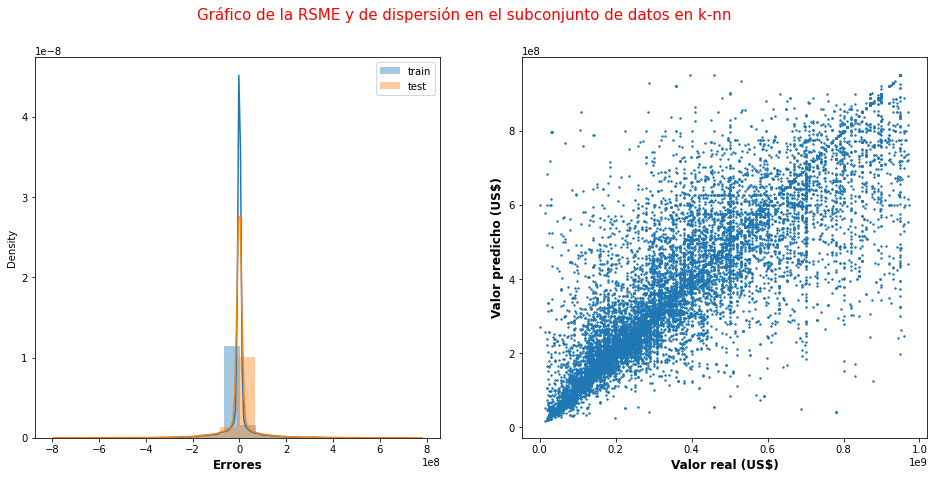

In [87]:
plt.figure(figsize = (16,7))
plt.suptitle('Gráfico de la RSME y de dispersión en el subconjunto de datos en k-nn ', fontsize= 15, color='red')

plt.subplot (1,2,1)

sns.distplot(y_train - y_train_pred_2, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_2, bins = 20, label = 'test')
plt.xlabel('Errores',fontweight = "black", fontsize = 12)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test,y_test_pred_2, s =2)
plt.xlabel('Valor real (US$)', fontweight = "black", fontsize = 12)
plt.ylabel('Valor predicho (US$)', fontweight = "black", fontsize = 12)


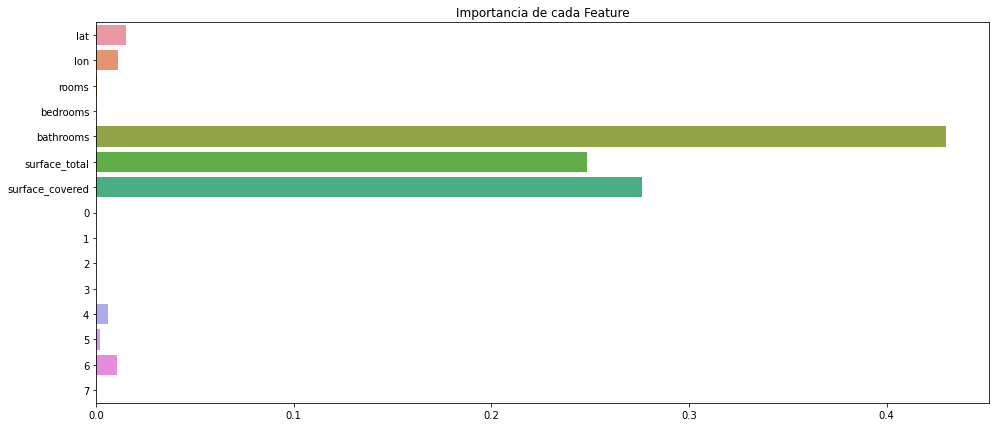

In [88]:
plt.figure(figsize = (16,7))

importances = tree_regressor.feature_importances_
columns = X.columns
sns.barplot(y = columns, x= importances)
plt.title('Importancia de cada Feature')
plt.show()

# Random Forest

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

randomf = RandomForestRegressor()
randomf_scores = cross_val_score(randomf, X, y, cv=5)
randomf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

RandomForestRegressor()

In [90]:
print(randomf_scores)
print("Precisión para Random Forest: %0.2f (+/- %0.2f)" % (randomf_scores.mean(), randomf_scores.std() * 2))

[0.94820142 0.9500344  0.9530533  0.9436144  0.94595019]
Precisión para Random Forest: 0.95 (+/- 0.01)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Text(0, 0.5, 'Valor predicho')

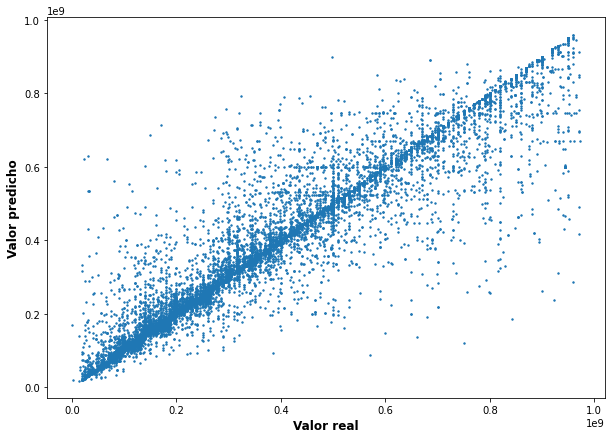

In [93]:
y_train_pred3 = randomf.predict(X_train)
y_test_pred3 = randomf.predict(X_test)

plt.figure(figsize = (10,7))

plt.scatter(y_test,y_test_pred3, s =2)
plt.xlabel('Valor real', fontweight = "black", fontsize = 12)
plt.ylabel('Valor predicho', fontweight = "black", fontsize = 12)

In [94]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred3))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred3))
print(f'La raíz del error cuadrático medio en Train es: {rmse_train}')
print(f'La raíz del error cuadrático medio en Test es: {rmse_test}')
print('La precisión del modelo de Random Forest en train es:', randomf.score (X_train,y_train))
print('La precisión del modelo de Random Forest en test es:', randomf.score (X_test,y_test))

La raíz del error cuadrático medio en Train es: 22008513.294079546
La raíz del error cuadrático medio en Test es: 46759046.37721461


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


La precisión del modelo de Random Forest en train es: 0.9878265403223833


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


La precisión del modelo de Random Forest en test es: 0.944456578002556


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

In [96]:
reg_lineal = LinearRegression()
reg_lineal_scores = cross_val_score(reg_lineal, X, y, cv=5)
reg_lineal.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

LinearRegression()

In [97]:
print(reg_lineal_scores)
print("Precisión para el modelo de Regresión Lineal: %0.2f (+/- %0.2f)" % (reg_lineal_scores.mean(), reg_lineal_scores.std() * 2))

[0.38434749 0.38997977 0.39268112 0.38711763 0.39108634]
Precisión para el modelo de Regresión Lineal: 0.39 (+/- 0.01)


In [98]:
#Ahora evaluamnos en el conjunto de hold-hout
y_train_pred4 = reg_lineal.predict(X_train)
y_test_pred4 = reg_lineal.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred4))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred4))
print(f'La raíz del error cuadrático medio en Train es: {rmse_train}')
print(f'La raíz del error cuadrático medio en Test es: {rmse_test}')
print('La precisión del modelo de Regresión Lineal en train es:', reg_lineal.score (X_train,y_train))
print('La precisión del modelo de Regresión Lineal en test es:', reg_lineal.score (X_test,y_test))

La raíz del error cuadrático medio en Train es: 156066548.65276998
La raíz del error cuadrático medio en Test es: 154464615.33734235
La precisión del modelo de Regresión Lineal en train es: 0.38785788269816124
La precisión del modelo de Regresión Lineal en test es: 0.39387896448718085


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
